In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
y_predicted=np.array([1,1,0,0,1])
y_true=np.array([0.30,0.7,1,0,0.5])



In [3]:
def mae(y_true,y_predicted):
    total_error=0
    for yt,yp in zip(y_true,y_predicted):
        total_error+=abs(yt-yp)
        print("Total error",total_error)
    mae=total_error/len(y_true)
    print("Mae",mae)
    return mae

In [4]:
mae(y_true,y_predicted)

Total error 0.7
Total error 1.0
Total error 2.0
Total error 2.0
Total error 2.5
Mae 0.5


np.float64(0.5)

In [10]:
np.mean(np.abs(y_true-y_predicted))

np.float64(0.5)

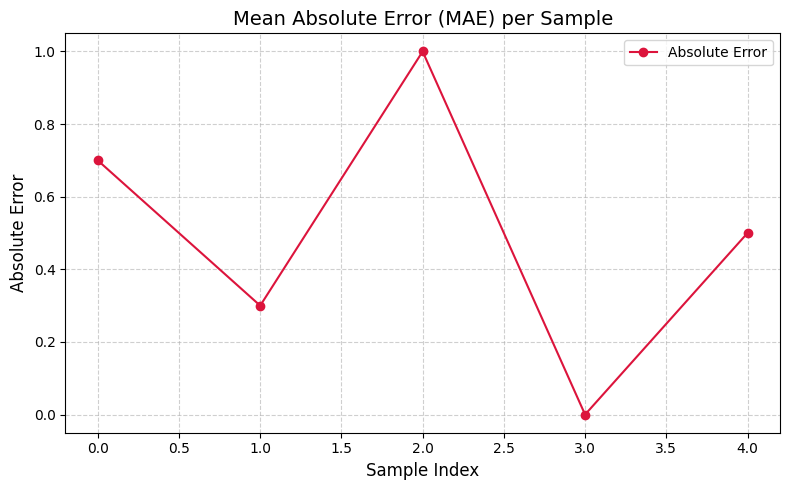

In [12]:
mae=np.abs(y_true-y_predicted)
plt.figure(figsize=(8, 5))
plt.plot(range(len(y_true)),mae , marker='o', linestyle='-', color='crimson', label='Absolute Error')

plt.title("Mean Absolute Error (MAE) per Sample", fontsize=14)
plt.xlabel("Sample Index", fontsize=12)
plt.ylabel("Absolute Error", fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [15]:
#log loss or Binary entropy
epsilon=1e-15
y_predicted_new=[max(i,epsilon) for i in y_predicted]
y_predicted_new


[np.int64(1), np.int64(1), 1e-15, 1e-15, np.int64(1)]

In [16]:
y_predicted_new=[min(i,1-epsilon) for i in y_predicted_new]
y_predicted_new

[0.999999999999999, 0.999999999999999, 1e-15, 1e-15, 0.999999999999999]

In [17]:
y_predicted_new=np.array(y_predicted_new)

In [18]:
-np.mean(y_true*np.log(y_predicted_new)+(1-y_true)* np.log(1-y_predicted_new))

np.float64(17.2696280766844)

In [19]:
def log_loss(y_true,y_predicted):
    epsilon=1e-15
    y_predicted_new=[max(i,epsilon) for i in y_predicted]
    y_predicted_new=[min(i,1-epsilon) for i in y_predicted_new]
    y_predicted_new=np.array(y_predicted_new)
    return -np.mean(y_true* np.log(y_predicted_new)+(1-y_true)* np.log(1-y_predicted_new))

In [20]:
log_loss(y_true,y_predicted)

np.float64(17.2696280766844)

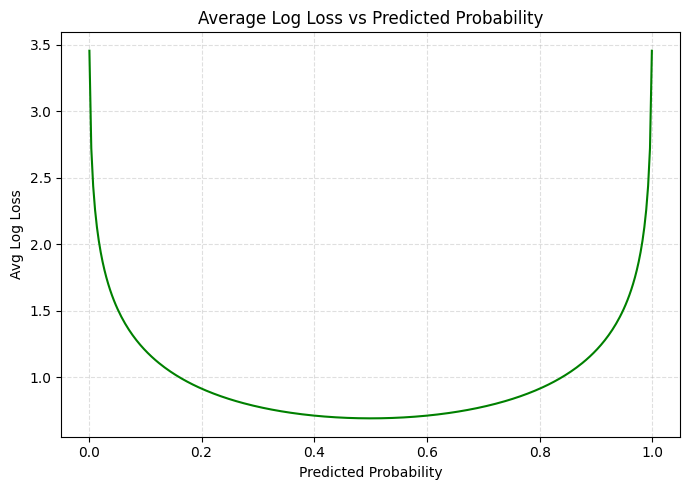

In [35]:
x = np.linspace(0.001, 0.999, 300)
log_losses = [-np.mean(y_true * np.log(p) + (1 - y_true) * np.log(1 - p)) for p in x]

plt.figure(figsize=(7, 5))
plt.plot(x, log_losses, color='green')
plt.title("Average Log Loss vs Predicted Probability")
plt.xlabel("Predicted Probability")
plt.ylabel("Avg Log Loss")
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

In [21]:
#mean_squared_error
np.mean((y_true-y_predicted)**2)

np.float64(0.366)

In [22]:
def mse(y_true,y_predicted):
    total_error=0
    for yt,yp in zip(y_true,y_predicted):
        total_error+=abs(yt-yp)**2
        print("Total error",total_error)
    mse=total_error/len(y_true)
    print("Mae",mse)
    return mse

In [23]:
mse(y_true,y_predicted)

Total error 0.48999999999999994
Total error 0.58
Total error 1.58
Total error 1.58
Total error 1.83
Mae 0.366


np.float64(0.366)

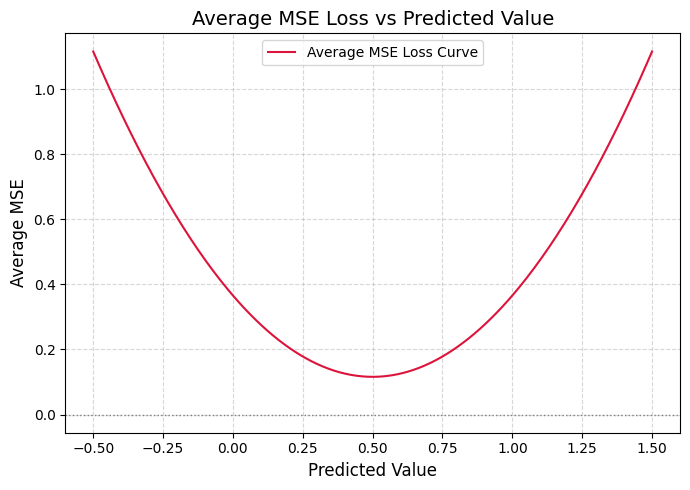

In [30]:
x = np.linspace(-0.5, 1.5, 300)
mse = np.array([( (yt - x)**2 ) for yt in y_true])  
avg_mse = mse.mean(axis=0)  

plt.figure(figsize=(7, 5))
plt.plot(x, avg_mse, color='crimson', label='Average MSE Loss Curve')
plt.axhline(y=0, color='gray', linestyle=':', linewidth=1)
plt.title("Average MSE Loss vs Predicted Value", fontsize=14)
plt.xlabel("Predicted Value", fontsize=12)
plt.ylabel("Average MSE", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()

In [38]:
def huber(y_true, y_predicted, delta=0.5):
    total_error = 0
    for yt, yp in zip(y_true, y_predicted):
        error = yt - yp
        if abs(error) <= delta:
            loss = 0.5 * error**2
        else:
            loss = delta * (abs(error) - 0.5 * delta)
        total_error += loss
    huber_loss = total_error / len(y_true)
    print("Huber Loss:", huber_loss)
    return huber_loss


In [39]:
huber(y_true, y_predicted, delta=0.5)

Huber Loss: 0.154


np.float64(0.154)

Huber Loss: 0.625
Huber Loss: 0.6199832775919732
Huber Loss: 0.6149665551839465
Huber Loss: 0.6099498327759197
Huber Loss: 0.604933110367893
Huber Loss: 0.5999163879598662
Huber Loss: 0.5948996655518395
Huber Loss: 0.5898829431438127
Huber Loss: 0.584866220735786
Huber Loss: 0.5798494983277592
Huber Loss: 0.5748327759197325
Huber Loss: 0.5698160535117056
Huber Loss: 0.564799331103679
Huber Loss: 0.5597826086956521
Huber Loss: 0.5547658862876255
Huber Loss: 0.5497491638795986
Huber Loss: 0.544732441471572
Huber Loss: 0.5397157190635451
Huber Loss: 0.5346989966555185
Huber Loss: 0.5296822742474916
Huber Loss: 0.524665551839465
Huber Loss: 0.5196488294314381
Huber Loss: 0.5146321070234113
Huber Loss: 0.5096153846153846
Huber Loss: 0.5045986622073578
Huber Loss: 0.4995819397993311
Huber Loss: 0.4945652173913043
Huber Loss: 0.48954849498327757
Huber Loss: 0.4845317725752508
Huber Loss: 0.47951505016722407
Huber Loss: 0.4744983277591973
Huber Loss: 0.46948160535117056
Huber Loss: 0.464464882

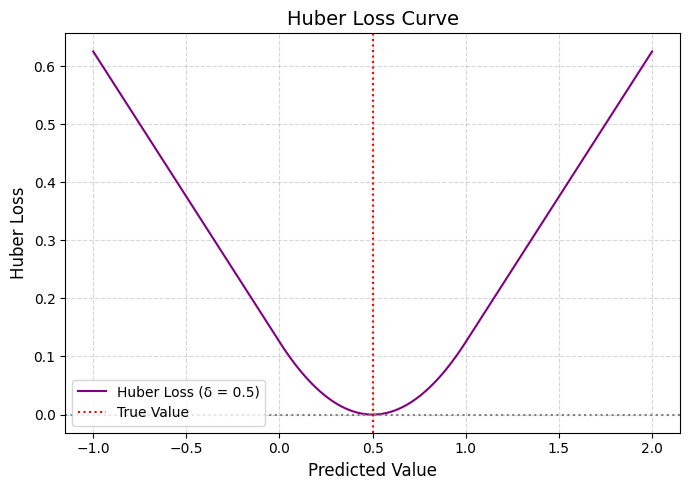

In [41]:
yt_fixed = np.mean(y_true)
y_pred_range = np.linspace(-1, 2, 300)
huber_losses = [huber([yt_fixed], [yp], delta=0.5) for yp in y_pred_range]

# Plot
plt.figure(figsize=(7, 5))
plt.plot(y_pred_range, huber_losses, color='purple', label=f"Huber Loss (δ = 0.5)")
plt.axvline(x=yt_fixed, color='red', linestyle=':', label='True Value')
plt.axhline(y=0, color='gray', linestyle=':')
plt.title("Huber Loss Curve", fontsize=14)
plt.xlabel("Predicted Value", fontsize=12)
plt.ylabel("Huber Loss", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()

In [33]:
def categorical_crossentropy(y_true,y_predicted):
    epsilon=1e-15
    y_predicted_new=[max(i,epsilon) for i in y_predicted]
    y_predicted_new=[min(i,1-epsilon) for i in y_predicted_new]
    y_predicted_new=np.array(y_predicted_new)
    loss_per_sample = -np.sum(y_true * np.log(y_predicted_new))
    return np.mean(loss_per_sample)

In [34]:
categorical_crossentropy(y_true,y_predicted)

np.float64(34.538776394910684)